In [67]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [68]:
rain_minimum = 1.0
rain_maximum = 250.0
rain_step = 1.0
spd = 86400.0
sph = 3600.0
mpy = 30.4167

nrainbin = int((rain_maximum-rain_minimum)/rain_step) + 1

rain_pdf = np.linspace(rain_minimum,rain_maximum, num=nrainbin, endpoint=True)
rain_bin = np.zeros((nrainbin-1))


In [69]:

pr = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/reanalysis/MERRA/PRECTOT_MERRA2.tavg1_2m_flx_Nx.1980-2021.nc')

pr




<xarray.Dataset>
Dimensions:    (time: 505, bnds: 2, lon: 576, lat: 361)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01T12:00:00 ... 2022-01-01T12:00:00
  * lon        (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat        (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [70]:
pr = pr.sel(time=slice('1980-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))


In [71]:

#interpolating to new lat and lon

#new_lon = np.arange(85,94,0.5)
#new_lat = np.arange(17,28,0.5)
#pr = pr.interp(latitude=new_lat,longitude=new_lon)
#pr


In [72]:
pr= pr.sel(lon=slice(86,94),lat=slice(18,27))
pr

<xarray.Dataset>
Dimensions:    (time: 430, bnds: 2, lon: 13, lat: 19)
Coordinates:
  * time       (time) datetime64[ns] 1980-02-01T12:00:00 ... 2015-11-16
  * lon        (lon) float64 86.25 86.88 87.5 88.12 ... 91.88 92.5 93.12 93.75
  * lat        (lat) float64 18.0 18.5 19.0 19.5 20.0 ... 25.5 26.0 26.5 27.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 1980-02-01T00:30:00 ... 2015-11-30...
    PRECTOT    (time, lat, lon) float32 ...
Attributes: (12/34)
    CDI:                               Climate Data Interface version 1.9.9rc...
    history:                           Thu Jun 16 11:24:03 2022: cdo mergetim...
    Conventions:                       CF-1
    History:                           Original file generated: Sat May 31 17...
    Comment:                           GMAO filename: d5124_m2_jan79.tavg1_2d...
    Filename:                          MERRA2_100.tavg1_2d_flx_Nx.19800101.nc4
    ...                                ...
    RangeBeginningTime:                00:00:00.000000
    RangeEndingDate:                   1980-01-01
    RangeEndingTime:                   23:59:59.000000
    frequency:                         mon
    NCO:                               netCDF Operators version 4.8.1 (Homepa...
    CDO:                               Climate Data Operators version 1.9.9rc...

In [73]:
size = pr.PRECTOT.shape
print(size)


(430, 19, 13)


In [74]:
for time in range(size[0]):
        data = pr.PRECTOT[time,Ellipsis] * spd
        nzd  = data.values[tuple(np.where(data >= rain_minimum))]
        hist = np.histogram(nzd,
                            bins = nrainbin-1,
                            range = (rain_minimum, rain_maximum))
        rain_bin = rain_bin + hist[0]

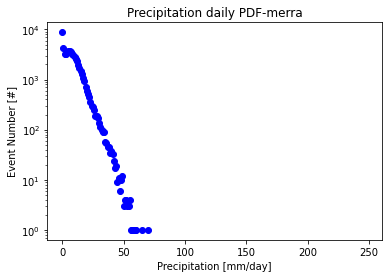

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(rain_bin, 'bo')
ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('Precipitation [mm/day]')
plt.ylabel('Event Number [#]')
plt.title('Precipitation daily PDF-merra')
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/pdf_merra.png")



plt.show( )